In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## Import and split data

In [115]:
public_df = pd.read_csv('data/public-study/EmoTrak-emotrak-2018-04-19T20_50_09.379Z.csv')

In [116]:
train, test = train_test_split(public_df, shuffle=True)

In [44]:
pd.set_option('display.max_columns', 999)

In [45]:
len(train)/len(public_df)

0.749932669000808

In [46]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missings', 'Percent Missings'])
missing_data

,Total Missings,Percent Missings
spendingDayOther,5482,0.984378
otherEmotion,5467,0.981684
workPositiveInfluence,5122,0.919734
spendingDay,5013,0.900162
connectedPatients,5013,0.900162
connectedColleagues,5013,0.900162
sleptFor,5013,0.900162
emotionResponse,4251,0.763333
emotionResponseHelpful,2555,0.458790
workPilingUp,864,0.155145


In [117]:
# def fix_spelling(df, col):
#     df[col] = df[col].replace('embarrased', 'embarrassed')
#     return df

train['specificEmotion'] = train['specificEmotion'].replace('embarrased', 'embarrassed')
test['specificEmotion'] = test['specificEmotion'].replace('embarrased', 'embarrassed')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
train['timestamp'].head()

6314    1506488667
1705    1495708214
6414    1506631851
4038    1504010492
2621    1503583645
Name: timestamp, dtype: int64

In [122]:
train['timestamp'] = pd.to_datetime(train['timestamp'], unit='s')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
train.timestamp.dt.hour

6314     5
1705    10
6414    20
4038    12
2621    14
6917    11
2814     3
1047    20
4616    19
2526     2
7425    10
7171    19
483     13
1091     2
5135     2
2080    20
1953     7
751     22
141     23
2156    23
1158     2
7229    23
307      8
6563    13
4281    10
1367    18
4632    18
1054     1
537     22
3937    23
        ..
648      4
7365    17
384     19
6879    20
3701     1
1441     2
6200    14
3193    10
4142    19
6556    11
494      4
6731     3
2145    23
4086    16
5644     1
4605    16
1719    22
6469    13
6201    14
1755    14
926     23
951     17
6389    12
5674    19
6186    10
5132     2
7343    18
5290    21
7040    17
3235    15
Name: timestamp, Length: 5569, dtype: int64

In [48]:
test_subset = test[['feelingEmotion', 'generalEmotion', 'specificEmotion',
       'intensity', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 'bodySensationForehead', 'bodySensationEyes',
       'bodySensationJaw', 'bodySensationNeck', 'bodySensationShoulders',
       'bodySensationChest', 'bodySensationArms', 'bodySensationHands',
       'bodySensationStomach', 'bodySensationBowel', 'bodySensationLegs',
       'bodySensationFeet', 'bodySensationLowerBack', 'bodySensationUpperBack',
       'bodySensationOther', 'bodySensationOtherLocation', 
       'emotionDuration', 'selfCareEatingWell',
       'selfCareCooking', 'selfCareExercise', 'selfCareSeekingSupport',
       'selfCareTimeOutside', 'selfCareSpiritualPractice',
       'selfCareQualityTimeTogether', 'selfCareQualityTimeAlone',
       'selfCarePet', 'selfCareOther', 'selfCareNone', 'selfCareOtherActivity']]

In [13]:
# fix_spelling(test_subset, 'specificEmotion')

In [176]:
# test_subset['specificEmotion'] = test_subset['specificEmotion'].replace('embarrased', 'embarrassed')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
train_subset = train[['feelingEmotion', 'generalEmotion', 'specificEmotion',
       'intensity', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 'bodySensationForehead', 'bodySensationEyes',
       'bodySensationJaw', 'bodySensationNeck', 'bodySensationShoulders',
       'bodySensationChest', 'bodySensationArms', 'bodySensationHands',
       'bodySensationStomach', 'bodySensationBowel', 'bodySensationLegs',
       'bodySensationFeet', 'bodySensationLowerBack', 'bodySensationUpperBack',
       'bodySensationOther', 'bodySensationOtherLocation', 
       'emotionDuration', 'selfCareEatingWell',
       'selfCareCooking', 'selfCareExercise', 'selfCareSeekingSupport',
       'selfCareTimeOutside', 'selfCareSpiritualPractice',
       'selfCareQualityTimeTogether', 'selfCareQualityTimeAlone',
       'selfCarePet', 'selfCareOther', 'selfCareNone', 'selfCareOtherActivity']]

In [50]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5569 entries, 2758 to 4586
Data columns (total 36 columns):
feelingEmotion                 5569 non-null object
generalEmotion                 5569 non-null object
specificEmotion                5569 non-null object
intensity                      5569 non-null float64
generalTrigger                 5544 non-null object
specificTrigger                5544 non-null object
bodySensationIntensity         5569 non-null float64
bodySensationForehead          5569 non-null int64
bodySensationEyes              5569 non-null int64
bodySensationJaw               5569 non-null int64
bodySensationNeck              5569 non-null int64
bodySensationShoulders         5569 non-null int64
bodySensationChest             5569 non-null int64
bodySensationArms              5569 non-null int64
bodySensationHands             5569 non-null int64
bodySensationStomach           5569 non-null int64
bodySensationBowel             5569 non-null int64
bodySensationL

## Why is the code below not working to fill NaN's?

In [104]:
train.head()

,row_id,user_id,record_id,recordReceived_ISO8601,recordReceived_secondsSinceMidnight1Jan1970UTC,surveyNumber,timestamp,startTime,associatedAlert,responseLagSeconds,dailyAlertNumber,spendingDay,spendingDayOther,sleptFor,tiredness,connectedColleagues,connectedPatients,feelingEmotion,generalEmotion,specificEmotion,otherEmotion,intensity,trigger,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionResponse,emotionDuration,emotionResponseHelpful,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,workPositiveInfluence
2758,854071,3c3dad27-e287-48a3-8579-254293212a4f.4c67fc81b...,4c7118d9825.a7722727-8315-4afd-99f8-1224ab2b04db,2017-08-24T21:45:50.281Z,1503611150,1,1503610977,2017-08-24T17:42:57.249-0400,4c7117346d2.6384f64a-113f-42d5-ae30-57a3d0bf44dd,17083.0,1.0,NaN,NaN,NaN,0.5,NaN,NaN,yes,fear,anxious,NaN,0.75,Too much to do. I have a weddings to attend th...,workStress,workload,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,60+,helpful,0,0,0,0,0,0,0,0,0,0,0,0,very,NaN
7139,910749,0e8a8ca1-855c-4884-8c92-16b1ad954d9e.4cd92b435...,4d01e3df127.afe728c5-0518-40d4-bd57-697a1e5f7299,2017-10-08T21:25:11.236Z,1507497911,27,1507497774,2017-10-08T15:22:54.380-0600,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,yes,fear,worried,NaN,0.50,Wife is sad and I don't know what's wrong or h...,socialStress,soChallenge,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,5,neutral,0,0,0,0,0,0,0,0,0,0,0,0,slightly,NaN
162,409440,c35cc104-19cc-4a83-ad8f-4c94032581af.487da414e...,4881e9e8b21.eec9b225-dba2-4796-ad73-f3329300b692,2016-10-16T16:42:23.140Z,1476636143,1,1476574701,2016-10-15T16:38:21.925-0700,4881e930f64.96958f6d-9e8d-4b71-bd4f-21bbb8ea7182,5349.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,enjoyment,enthusiastic,NaN,0.75,Dance class,wellbeing,exercise,0.75,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,enjoyment,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2529,852370,e0b7aa4e-a833-4732-9e7e-2be39739255c.4c6dfba3d...,4c6e7ff3982.05098ba0-e599-4d13-b1bb-2d3dad1d9a6a,2017-08-24T02:23:51.049Z,1503541431,1,1503541028,2017-08-23T20:17:08.308-0600,4c6e7c1effc.1b56a19c-6074-434b-8f39-9ae8ad577dc4,77.0,4.0,NaN,NaN,NaN,0.5,NaN,NaN,yes,enjoyment,enthusiastic,NaN,0.75,I found a possible to a huge problem in my dep...,workSatisfaction,success,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,completely,NaN
997,467833,3e9397a2-d831-4dd2-a646-9b4db2c85e80.48af42a8f...,48d940bbe61.cb353a7c-2125-43e8-80fa-dc70daa74690,2016-11-12T02:54:31.072Z,1478919271,17,1478919218,2016-11-11T18:53:38.444-0800,48d9403df2d.0bfecb26-43c6-40ea-890f-a94bf9d3725f,4962.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,enjoyment,happy,NaN,0.25,Going on a date I'm excited about,socialSupport,timeSO,0.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,observation,60,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [105]:
train['dailyAlertNumber'].value_counts()

2.0    1774
1.0    1709
3.0    1127
4.0     224
5.0     187
Name: dailyAlertNumber, dtype: int64

In [18]:
train_subset[train_subset.isnull().any(axis=1)].index

Int64Index([1892, 1864, 1885, 1873, 1861, 1859, 1872, 1877, 1863, 1868, 1888,
            1879, 1878, 1871, 1862, 1860, 1870, 1876, 1866, 1883, 1875, 1889],
           dtype='int64')

In [19]:
train_subset['generalTrigger'].loc[train_subset[train_subset.isnull().any(axis=1)].index] = train_subset['generalTrigger'].mode()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
train_subset[['generalTrigger', 'specificTrigger']].mode()

,generalTrigger,specificTrigger
0,wellbeing,play


In [55]:
train_subset = train_subset['generalTrigger'].fillna(train_subset['generalTrigger'].mode())

In [20]:
train_subset[train_subset.isnull().any(axis=1)]

,feelingEmotion,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity
1892,yes,anger,angry,0.75,NaN,NaN,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1864,yes,enjoyment,peaceful,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0
1885,yes,anger,angry,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1873,no,sadness,discouraged,0.25,NaN,NaN,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0
1861,yes,anger,irritated,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
1859,yes,anger,angry,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
1872,no,fear,afraid,0.25,NaN,NaN,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
1877,yes,other,ashamed,0.25,NaN,NaN,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
1863,yes,enjoyment,peaceful,0.50,NaN,NaN,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60+,0,0,0,0,0,0,0,0,0,0,0,0
1868,yes,sadness,sad,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
train_subset['emotionDuration'] = train_subset['emotionDuration'].replace('60+', 90)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [178]:
test_subset['emotionDuration'] = test_subset['emotionDuration'].replace('60+', 90)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
train_subset = train_subset.replace({'embarrased': 'embarrassed', 'yes': 1, 'no': 0, '60+': 90})

In [52]:
test_subset = test_subset.replace({'embarrased': 'embarrassed', 'yes': 1, 'no': 0, '60+': 90})

## Drop NaN's instead

In [53]:
train_subset = train_subset.dropna()

In [54]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5544 entries, 2758 to 4586
Data columns (total 36 columns):
feelingEmotion                 5544 non-null int64
generalEmotion                 5544 non-null object
specificEmotion                5544 non-null object
intensity                      5544 non-null float64
generalTrigger                 5544 non-null object
specificTrigger                5544 non-null object
bodySensationIntensity         5544 non-null float64
bodySensationForehead          5544 non-null int64
bodySensationEyes              5544 non-null int64
bodySensationJaw               5544 non-null int64
bodySensationNeck              5544 non-null int64
bodySensationShoulders         5544 non-null int64
bodySensationChest             5544 non-null int64
bodySensationArms              5544 non-null int64
bodySensationHands             5544 non-null int64
bodySensationStomach           5544 non-null int64
bodySensationBowel             5544 non-null int64
bodySensationLe

In [55]:
test_subset = test_subset.dropna()

## Dummify categoricals

In [56]:
train_subset.head()

,feelingEmotion,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity
2758,1,fear,anxious,0.75,workStress,workload,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0
7139,1,fear,worried,0.50,socialStress,soChallenge,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
162,1,enjoyment,enthusiastic,0.75,wellbeing,exercise,0.75,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
2529,1,enjoyment,enthusiastic,0.75,workSatisfaction,success,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
997,1,enjoyment,happy,0.25,socialSupport,timeSO,0.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
generalEmotion_cols = pd.get_dummies(train_subset.generalEmotion)

In [58]:
specificEmotion_cols = pd.get_dummies(train_subset.specificEmotion)

In [59]:
generalTrigger_cols = pd.get_dummies(train_subset.generalTrigger)

In [60]:
specificTrigger_cols = pd.get_dummies(train_subset.specificTrigger)

In [61]:
train_subset[generalEmotion_cols.columns] = generalEmotion_cols 

In [62]:
train_subset[specificEmotion_cols.columns] = specificEmotion_cols

In [63]:
train_subset[generalTrigger_cols.columns] = generalTrigger_cols

In [64]:
train_subset[specificTrigger_cols.columns] = specificTrigger_cols

In [65]:
train_subset = train_subset.drop(['generalEmotion', 'specificEmotion', 'generalTrigger', 'specificTrigger'], axis=1)

In [29]:
# train_subset = train_subset.drop(['climateChange'], axis=1)

In [66]:
generalEmotion_cols = pd.get_dummies(test_subset.generalEmotion)

In [67]:
specificEmotion_cols = pd.get_dummies(test_subset.specificEmotion)

In [68]:
generalTrigger_cols = pd.get_dummies(test_subset.generalTrigger)

In [69]:
specificTrigger_cols = pd.get_dummies(test_subset.specificTrigger)

In [70]:
test_subset[generalEmotion_cols.columns] = generalEmotion_cols

In [71]:
test_subset[specificEmotion_cols.columns] = specificEmotion_cols

In [72]:
test_subset[generalTrigger_cols.columns] = generalTrigger_cols

In [73]:
test_subset[specificTrigger_cols.columns] = specificTrigger_cols

In [74]:
test_subset = test_subset.drop(['generalEmotion', 'specificEmotion', 'generalTrigger', 'specificTrigger'], axis=1)

## Scale data

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [233]:
# scaler = StandardScaler()
# # train_subset['emotionDuration'].reshape(-1,1)
# scaler.fit(train_subset)
# new_train = scaler.transform(train_subset)

In [76]:
scaler2 = MinMaxScaler(feature_range = (0,1))
scaler2.fit(train_subset)
newer_train = scaler2.transform(train_subset)
newer_train

array([[1.  , 0.75, 0.75, ..., 0.  , 0.  , 1.  ],
       [1.  , 0.5 , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.75, 0.75, ..., 0.  , 0.  , 0.  ],
       ...,
       [1.  , 0.25, 0.5 , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.5 , 0.5 , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.5 , 0.5 , ..., 0.  , 0.  , 0.  ]])

In [78]:
for x in train_subset.columns:
    if x not in test_subset.columns:
        print(x)

## Train initial kMeans model

In [79]:
kmeans = KMeans(n_clusters=8).fit(train_subset)

In [80]:
predictions = kmeans.predict(test_subset)

In [81]:
predictions

array([4, 0, 1, ..., 6, 2, 4], dtype=int32)

In [82]:
np.unique(predictions, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([267, 342, 322, 253, 198,  78, 199, 188]))

In [214]:
kmeans2 = KMeans(n_clusters=3).fit(train_subset)

In [218]:
predictions2 = kmeans2.predict(test_subset)

In [219]:
predictions2

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [220]:
np.unique(predictions2, return_counts=True)

(array([0, 1, 2], dtype=int32), array([1130,  464,  253]))

## Silhouette Scores

In [83]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [102]:
silhouette_score(test_subset, predictions, metric='euclidean')

0.43387018786791137

In [221]:
silhouette_score(test_subset, predictions2, metric='jaccard')

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


-0.014552947402401581

For n_clusters = 3 The average silhouette_score is : 0.1173505608492032


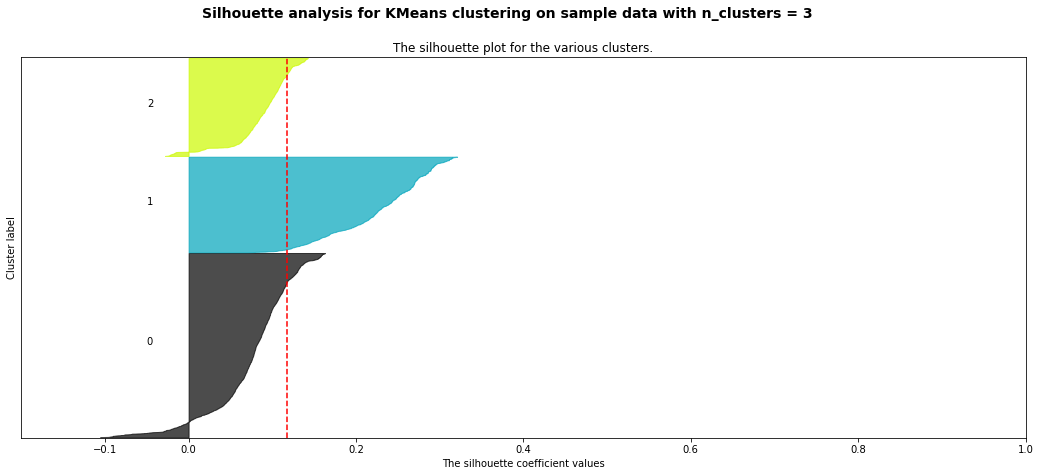

For n_clusters = 4 The average silhouette_score is : 0.1293829890314369


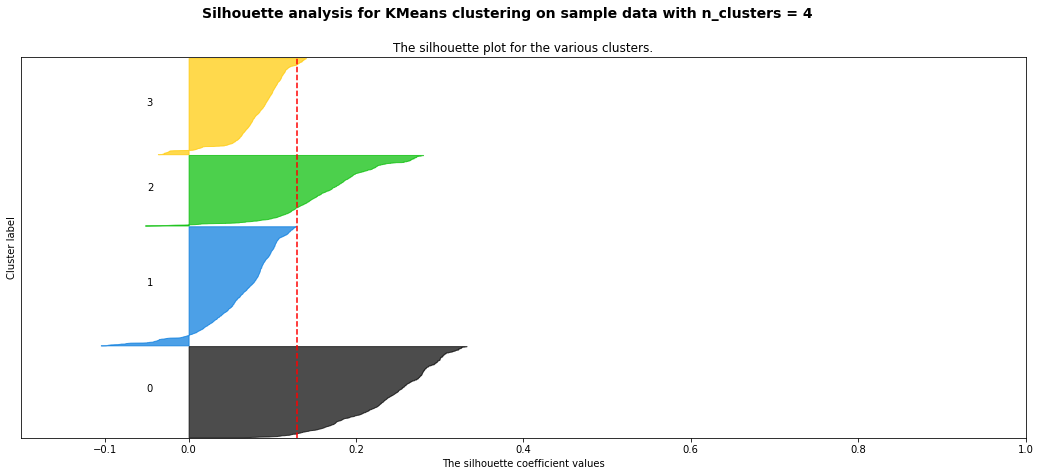

For n_clusters = 5 The average silhouette_score is : 0.1511562289903092


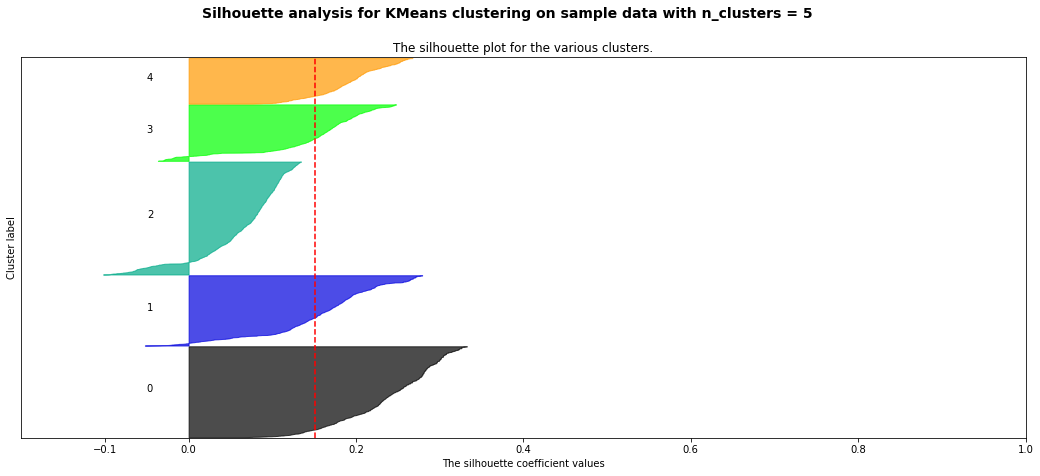

For n_clusters = 6 The average silhouette_score is : 0.1635758127714832


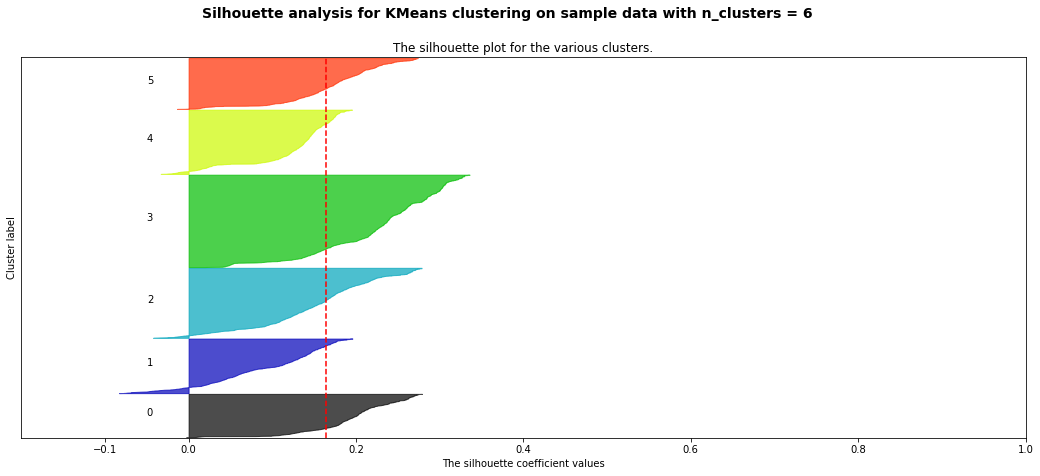

For n_clusters = 7 The average silhouette_score is : 0.1514536744281722


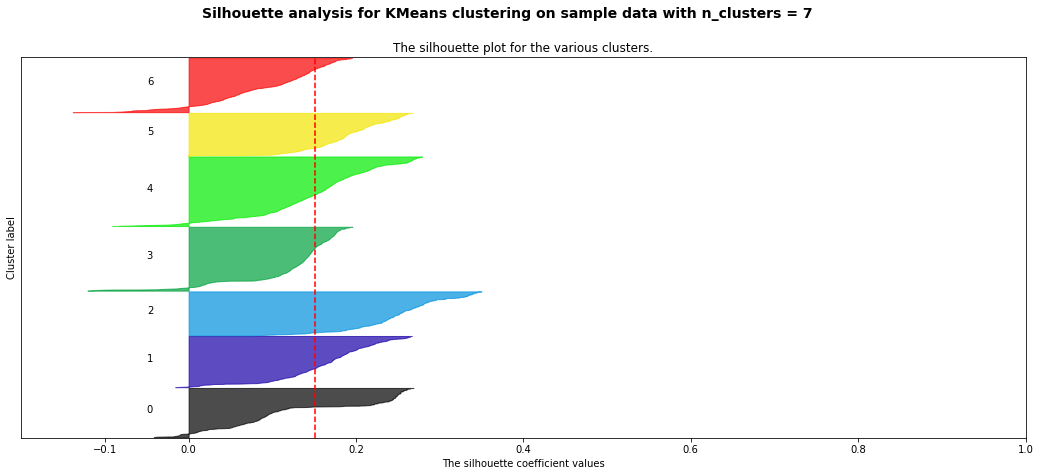

For n_clusters = 8 The average silhouette_score is : 0.15923635737555886


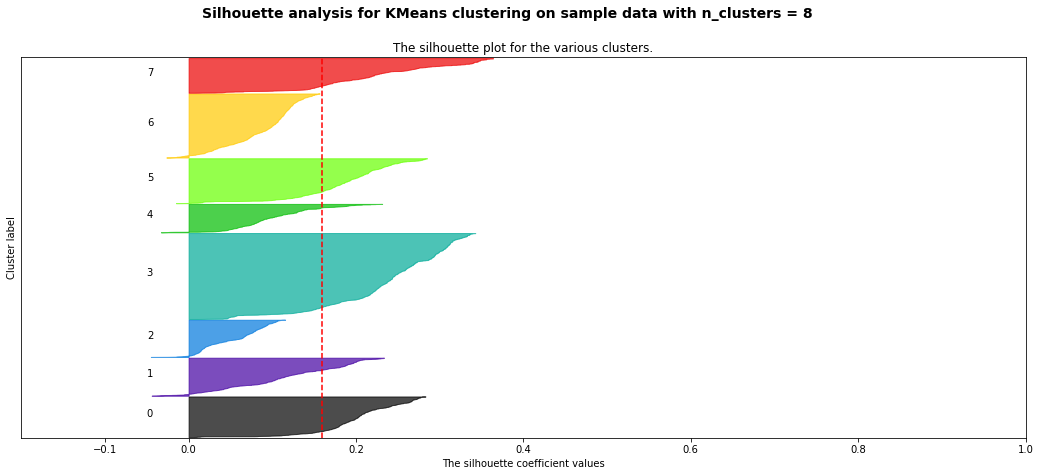

In [127]:
X = newer_train
range_n_clusters = range(3,9)

# taken from sklearn
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors)

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1],
#                 marker='o', c="white", alpha=1, s=200)

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Prediction Clusters

In [90]:
for i in range(kmeans.n_clusters):
    cluster_i = test_subset[predictions == i]

0
1
2
3
4
5
6
7


In [128]:
# Print out the centroids.
print("\nCluster centers:")
print(kmeans.cluster_centers_)


Cluster centers:
[[ 8.18934911e-01  6.20118343e-01  5.13313609e-01  3.55029586e-02
   3.66863905e-02  2.84023669e-02  4.73372781e-02  5.08875740e-02
   5.79881657e-02  3.90312782e-17  4.73372781e-03  5.32544379e-02
   1.65680473e-02  3.55029586e-03  2.36686391e-03  1.30177515e-02
   1.65680473e-02  7.10059172e-03  7.10059172e-03  9.00000000e+01
   1.77514793e-02  1.06508876e-02  1.18343195e-02  7.10059172e-03
   1.18343195e-02  8.28402367e-03  2.36686391e-02  2.13017751e-02
   1.30177515e-02  4.73372781e-03  2.01183432e-02  0.00000000e+00
   2.31952663e-01 -5.27355937e-15  4.13017751e-01  6.39053254e-02
   2.41420118e-01  3.31360947e-02  4.73372781e-02  4.61538462e-02
   2.26035503e-01  1.65680473e-02  9.82248521e-02  1.06508876e-02
  -9.99200722e-16  6.17561557e-16  8.52071006e-02  1.99840144e-15
   5.32544379e-02 -7.07767178e-16  9.23076923e-02  4.61538462e-02
   8.63905325e-02 -3.19189120e-15  9.11242604e-02  1.07692308e-01
   1.50295858e-01  2.76923077e-01  4.37869822e-02  4.49704

In [ ]:
centroids = 

In [ ]:
def  center_top_wordscenter_ (kmeans_model, svd_model, ftrs, num_words=10):
   '''
       Print out the top num_words for each of the centroids in the kmeans model,
       after we return the centroids back in 'word space' using the inverse SVD
       transformation
       
       input:
       kmeans_model -  kmeans model object
       svd_model - svd model object
       ftrs - the features from the TFIDF vectorizer
       num_words - number of words to display        
   '''
       
   num_words += 1
   
   ftrs_array = np.array(ftrs)

   centroids = svd_model.inverse_transform(kmeans_model.cluster_centers_)

   for c in centroids:
       ind = np.abs(c).argsort()
       ind = ind[-1:-num_words:-1]
       print(ftrs_array[ind], "\n")

In [129]:
# Find the top 10 features for each cluster.
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("\nTop features (words) for each cluster:\n")
for num, centroid in enumerate(top_centroids):
        print("%d: %s" % (num, ", ".join(features[i] for i in centroid)))


Top features (words) for each cluster:



NameError: name 'features' is not defined